In this notebook, I will check the input to chromopainter/finestructure, as well as create some supporting files. 

In [1]:
%run ../scripts/notebook_settings.py

In [2]:
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
vcf = "/faststorage/project/baboondiversity/data/haploidified_chrX_males/hap_chrX_males.vcf.gz"

In [4]:
meta_data_samples.loc[meta_data_samples.PGDP_ID == "PD_0215"]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin,x_missing
26,PD_0215,13RUM1130716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",M,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,26,"Cynocephalus, Central Tanzania",0.014343


In [3]:
callset = allel.read_vcf(vcf)

In [4]:
individuals = callset["samples"]

In [5]:
individuals

array(['PD_0215', 'PD_0217', 'PD_0223', 'PD_0227', 'PD_0228', 'PD_0229',
       'PD_0230', 'PD_0231', 'PD_0233', 'PD_0234', 'PD_0235', 'PD_0236',
       'PD_0268', 'PD_0269', 'PD_0637', 'PD_0658', 'PD_0687', 'PD_0688',
       'PD_0689', 'PD_0690', 'PD_0691', 'PD_0746', 'PD_0747', 'PD_0748',
       'PD_0752', 'PD_0753', 'PD_0755', 'PD_0756', 'PD_0757', 'PD_0761',
       'PD_0762', 'PD_0763', 'PD_0764', 'PD_0766', 'PD_0767', 'PD_0768',
       'PD_0771', 'PD_0775', 'Sci_30877', 'PD_0201', 'PD_0202', 'PD_0204',
       'PD_0207', 'PD_0218', 'PD_0220', 'PD_0242', 'PD_0266', 'PD_0267',
       'PD_0493', 'PD_0494', 'PD_0496', 'PD_0497', 'PD_0498', 'PD_0502',
       'PD_0504', 'PD_0505', 'PD_0508', 'PD_0642', 'PD_0650', 'PD_0654',
       'PD_0679', 'PD_0681', 'PD_0684', 'PD_0720', 'PD_0722', 'PD_0723',
       'PD_0725', 'PD_0727', 'PD_0728', 'PD_0729', 'PD_0731', 'PD_0732',
       'PD_0733', 'PD_0734', 'PD_0735', 'PD_0739', 'PD_0740', 'PD_0741',
       'PD_0742', 'PD_0743', 'PD_0749', 'PD_0750'

In [42]:
meta_data_samples.loc[(meta_data_samples.PGDP_ID == "PD_0687") & (meta_data_samples.Sex == "M")]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin,x_missing
119,PD_0687,130 / 12MKM1150715,Knauf/Chuma/Roos,Papio,cynocephalus,"Mikumi, Tanzania",M,"Mikumi, Kilosa, Morogoro, Coastal Zone, Tanzania",36.977032,-7.404852,119,"Cynocephalus, Central Tanzania",0.015864


In [43]:
meta_data_samples.loc[(meta_data_samples.Origin == "Ruaha, Tanzania") & (meta_data_samples.Sex == "M")]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin,x_missing
26,PD_0215,13RUM1130716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",M,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,26,"Cynocephalus, Central Tanzania",0.014343
28,PD_0217,17RUM5140716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",M,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,28,"Cynocephalus, Central Tanzania",0.015386


In [44]:
meta_data_samples.C_origin.unique()

array(['Cynocephalus, Central Tanzania', 'Anubis, Kenya',
       'Kindae, Zambia', 'Gelada, Captive', 'Hamadryas, Ethiopia',
       'Anubis, Tanzania', 'Cynocephalus, Western Tanzania',
       'Papio, Senegal', 'Ursinus, Zambia', 'Anubis, Ethiopia'],
      dtype=object)

In [45]:
meta_data_samples.Origin.unique()

array(['Mikumi, Tanzania', 'Aberdare, Kenya', 'Chunga, Zambia', 'captive',
       'Awash, Ethiopia', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Mahale, Tanzania', 'Katavi, Tanzania',
       'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania', 'Niokolo-Koba, Senegal',
       'Issa Valley, Tanzania', 'Dendro Park, Zambia', 'Filoha, Ethiopia',
       'Gog Woreda, Gambella region, Ethiopia'], dtype=object)

In [6]:
pop_list = []
inclusion_list = []
for i in individuals:
    if i[0] == "S":
        i = i[4:]
        inclusion_list.append(0)
    else:
        if meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["Species"].values[0] == "ursinus (grayfoot)":
            inclusion_list.append(1)
        elif i == "PD_0687":
            inclusion_list.append(1)
        elif meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["Species"].values[0] == "papio":
            inclusion_list.append(1)
        else:
            inclusion_list.append(1)
    t_pop = meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["Origin"].values[0]
    C_origin = meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["C_origin"].values[0]
    if t_pop == 'Mikumi, Tanzania':
        t_pop = "Cynocephalus_Mikumi"
    elif t_pop == 'Serengeti, Tanzania' or t_pop == 'Gombe, Tanzania':
        t_pop = "Anubis_Gombe_Serengeti"
    elif C_origin ==  'Cynocephalus, Central Tanzania':
        t_pop = "Cynocephalus_Ruaha_Udzungwa_Selous"
    elif C_origin == 'Anubis, Tanzania':
        t_pop = "Anubis_Tarangire_Ngorongoro_Manyara"
    else:
        t_pop = C_origin.replace(" ", "_").replace(",", "" )
    pop_list.append(t_pop)

In [82]:
len(pop_list)

126

#Old Version
pop_list = []
inclusion_list = []
for i in individuals:
    if i[0] == "S":
        i = i[4:]
        inclusion_list.append(0)    
    else:
        inclusion_list.append(1)    
    if meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["Species"].values[0] == "ursinus (grayfoot)":
        pop_list.append("Ursinus")
    else:
        t_pop = meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["C_origin"].values[0]
        t_pop = t_pop.replace(" ", "_").replace(",", "" )
        pop_list.append(t_pop)

In [7]:
pop_df = pd.DataFrame()
pop_df["ID"] = individuals
pop_df["population"] = pop_list
pop_df["inclusion"] = inclusion_list

In [84]:
#Subsampling Mikumi
pop_df.loc[pop_df["population"] == "Cynocephalus_Mikumi"]
c = 0
for i, row in pop_df.loc[pop_df["population"] == "Cynocephalus_Mikumi"].iterrows():
    if c%2 == 0:
        pop_df.iloc[i, 2] = 0
        print(i)
    c += 1

12
14
17
19
21
23
25
27
29
31
33
35
37


In [10]:
pop_df.loc[pop_df["inclusion"] == 1]

,ID,population,inclusion
0,PD_0215,Cynocephalus_Ruaha_Udzungwa_Selous,1
1,PD_0217,Cynocephalus_Ruaha_Udzungwa_Selous,1
2,PD_0223,Cynocephalus_Ruaha_Udzungwa_Selous,1
3,PD_0227,Cynocephalus_Ruaha_Udzungwa_Selous,1
4,PD_0228,Cynocephalus_Western_Tanzania,1
...,...,...,...
121,PD_0398,Papio_Senegal,1
122,PD_0399,Papio_Senegal,1
123,PD_0400,Papio_Senegal,1
124,PD_0401,Papio_Senegal,1


In [11]:
pop_df.to_csv("/faststorage/project/baboondiversity/data/haploidified_chrX_males/idfile_all_PD.ids",
              sep=" ", header=False, index=False)

In [25]:
meta_data_samples_Sci = meta_data_samples.copy()
for i, row in meta_data_samples_Sci.iterrows():
    if row.PGDP_ID[0] != "P":
        meta_data_samples_Sci.at[i, "PGDP_ID"] = "Sci_"+str(row.PGDP_ID)

In [26]:
meta_data_samples_Sci.to_csv("../data/metadata_Sci_included.txt",
              sep=" ", header=False, index=False)
meta_data_samples_Sci.iloc[8:11]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin,x_missing
8,Sci_97124,97124,Jolly/Phillips-Conroy,Papio,hamadryas,"Awash, Ethiopia",M,"አዋሽ / Awash, Zone 3, አፋር ክልል / Afar, ኢትዮጵያ",40.167674,8.992496,8,"Hamadryas, Ethiopia",0.021821
9,PD_0067,1043,Roos,Theropithecus,gelada,captive,M,"SDSU Captive Wildlife Research Facility, Brook...",-96.793280,44.334031,9,"Gelada, Captive",0.024995
10,PD_0199,09SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,"Serengeti, Mara, Lake Zone, Tanzania",34.742544,-1.996626,10,"Anubis, Tanzania",0.003591


Generating an idfile with all individuals

In [16]:
vcf = "/home/eriks/baboondiversity/data/fs_input_unlinked/chr20.vcf.gz"
callset = allel.read_vcf(vcf)

In [17]:
individuals = callset["samples"]

In [18]:
pop_list = []
inclusion_list = []
for i in individuals:
    if i[0] == "S":
        i = i[4:]
    inclusion_list.append(1)       
    if meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["Species"].values[0] == "ursinus (grayfoot)":
        pop_list.append("Ursinus")
    else:
        t_pop = meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["C_origin"].values[0]
        t_pop = t_pop.replace(" ", "_").replace(",", "" )
        pop_list.append(t_pop)

In [19]:
pop_df = pd.DataFrame()
pop_df["ID"] = individuals
pop_df["population"] = pop_list
pop_df["inclusion"] = inclusion_list

In [20]:
pop_df.to_csv("/faststorage/project/baboondiversity/data/haploidified_chrX_males/idfile_autosomes.ids",
              sep=" ", header=False, index=False)

Generalized setup to handle the input from Alan in the Phased chromosomes.
Including both generating the idfile (should only be done once for all autosomes) and the recombination map based on Jurajs workflow. It will then be transformed based on the supplied conversion script.

In [6]:
#vcf = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/chr{}_phased_rehead.vcf.gz"
ldhat_path = "/faststorage/project/primatediversity/data/PG_baboons_pananu3_23_2_2021_ldhat/maps0.01/chr{}.map"
Ne = 15000
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']

for chrom in chromosome_numbers:
    ldhat_map = pd.read_csv(ldhat_path.format(chrom), sep="\t")
    if chrom == "X":
        Ne = Ne/2
    ldhat_map["COMBINED_rate(cM/Mb)"] = ldhat_map.Mean_rho*1000*100/(4*Ne)
    print("Mean cM/Mb", ldhat_map["COMBINED_rate(cM/Mb)"].mean())
    ldhat_map["i_l"] = np.append(ldhat_map["POS"][1:], ldhat_map["POS"][-1:])-ldhat_map["POS"]
    print("Chromosome-wide", np.nansum(ldhat_map["i_l"]*ldhat_map["COMBINED_rate(cM/Mb)"])/sum(ldhat_map["POS"][-1:]))
    ldhat_map["chrom"] = "chr{}".format(chrom)
    df = (pd.DataFrame(data={"chromosome": ldhat_map["chrom"], "position": ldhat_map["POS"],
                             "COMBINED_rate(cM/Mb)": ldhat_map["COMBINED_rate(cM/Mb)"], "pos_l": ldhat_map["POS"]}))
    df["Genetic_Map(cM)"] = (ldhat_map["i_l"] *df["COMBINED_rate(cM/Mb)"]/1000000).cumsum()
    df.to_csv("/home/eriks/baboondiversity/data/PG_panu3_recombination_map/ldhat_conversion_chr{}_mmul.txt".format(chrom),
              sep=" ", index=False, columns=["chromosome", "position", "COMBINED_rate(cM/Mb)", "Genetic_Map(cM)"])
    df["Genetic_Map(cM)"] = df["Genetic_Map(cM)"]/3
    df["COMBINED_rate(cM/Mb)"] = df["COMBINED_rate(cM/Mb)"]/3
    df.to_csv("/home/eriks/baboondiversity/data/PG_panu3_recombination_map/ldhat_conversion_chr{}_baboon.txt".format(chrom),
              sep=" ", index=False, columns=["chromosome", "position", "COMBINED_rate(cM/Mb)", "Genetic_Map(cM)"])
    df["Genetic_Map(cM)"] = df["Genetic_Map(cM)"]*10
    df["COMBINED_rate(cM/Mb)"] = df["COMBINED_rate(cM/Mb)"]*10
    df.to_csv("/home/eriks/baboondiversity/data/PG_panu3_recombination_map/ldhat_conversion_chr{}_10x.txt".format(chrom),
              sep=" ", index=False, columns=["chromosome", "position", "COMBINED_rate(cM/Mb)", "Genetic_Map(cM)"])
    print("Finished ", chrom)

Mean cM/Mb 0.527365212250684
Chromosome-wide 0.41073494827489554
Finished  1
Mean cM/Mb 0.4955170244219501
Chromosome-wide 0.39511913750554123
Finished  2
Mean cM/Mb 0.5353990492388011
Chromosome-wide 0.42942589053579927
Finished  3
Mean cM/Mb 0.7936917897288299
Chromosome-wide 0.4875335491015923
Finished  4
Mean cM/Mb 0.49817048757815235
Chromosome-wide 0.41310302351233674
Finished  5
Mean cM/Mb 0.5056773130869711
Chromosome-wide 0.39994794964116387
Finished  6
Mean cM/Mb 0.5981077451202219
Chromosome-wide 0.44288941169001583
Finished  7
Mean cM/Mb 0.6187395556563748
Chromosome-wide 0.48990537808649187
Finished  8
Mean cM/Mb 0.6793714189197433
Chromosome-wide 0.5132953198614009
Finished  9
Mean cM/Mb 0.7759862400037736
Chromosome-wide 0.5696066241939366
Finished  10
Mean cM/Mb 0.5965674863242026
Chromosome-wide 0.46602277334309405
Finished  11
Mean cM/Mb 0.5915431423807662
Chromosome-wide 0.45477855142459767
Finished  12
Mean cM/Mb 0.672137286371548
Chromosome-wide 0.5043452013730965


In [28]:
df_convert = pd.read_csv("/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/chr8.recombfile", sep=" ")

In [32]:
df_convert["recom.rate.perbp"].mean()

6.797623362539761e-09

In [37]:
df

,chromosome,position,COMBINED_rate(cM/Mb),pos_l,Genetic_Map(cM)
0,chr8,4263,0.077113,4263,0.000387
1,chr8,9280,0.077287,9280,0.000390
2,chr8,9322,0.077287,9322,0.001654
3,chr8,25679,0.077287,25679,0.001656
4,chr8,25695,0.077287,25695,0.001659
...,...,...,...,...,...
789085,chr8,140344478,0.863962,140344478,51.565594
789086,chr8,140344489,0.894650,140344489,51.565628
789087,chr8,140344527,0.925000,140344527,51.565991
789088,chr8,140344920,0.923987,140344920,51.567331


In [27]:
#Including all individuals
pop_list = []
inclusion_list = []
for i in individuals:
    if i[0] == "S":
        i = i[4:]
        inclusion_list.append(1)
    else:
        if meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["Species"].values[0] == "ursinus (grayfoot)":
            inclusion_list.append(1)
        elif meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["Species"].values[0] == "papio":
            inclusion_list.append(1)
        else:
            inclusion_list.append(1)
    t_pop = meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["Origin"].values[0]
    C_origin = meta_data_samples.loc[meta_data_samples.PGDP_ID == i]["C_origin"].values[0]
    t_pop = C_origin.replace(" ", "_").replace(",", "" )
    pop_list.append(t_pop)

In [29]:
pop_df = pd.DataFrame()
pop_df["ID"] = individuals
pop_df["population"] = pop_list
pop_df["inclusion"] = inclusion_list
pop_df.to_csv("/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/all_IDs.ids",
              sep=" ", header=False, index=False)
pop_df

,ID,population,inclusion
0,Sci_16066,Cynocephalus_Central_Tanzania,1
1,Sci_16098,Cynocephalus_Central_Tanzania,1
2,Sci_30877,Anubis_Kenya,1
3,Sci_30977,Anubis_Kenya,1
4,Sci_34449,Kindae_Zambia,1
...,...,...,...
222,PD_0790,Kindae_Zambia,1
223,PD_0791,Kindae_Zambia,1
224,PD_0792,Kindae_Zambia,1
225,PD_0793,Kindae_Zambia,1


Converting ldhat files to genetic maps.
Assuming that effective population size for chrX is 10000.

In [3]:
ldhat_path = "/faststorage/project/primatediversity/data/PG_baboons_pananu3_23_2_2021_ldhat/maps0.01/chrX.map"
uniform_rec_path = "/faststorage/project/baboondiversity/data/haploidified_chrX_males/uniform_rec.recombfile"
phase_file = "/faststorage/project/baboondiversity/data/haploidified_chrX_males/chrX_v3.phase"

In [4]:
ldhat_map = pd.read_csv(ldhat_path, sep="\t")
uni_map = pd.read_csv(uniform_rec_path, sep=" ")

In [5]:
f=open(phase_file)
lines=f.readlines()
pos_line = lines[2]
pos_list = [int(x) for x in pos_line.split(" ")[1:]]
f.close()

Uniform recombination maps

In [30]:
uniform_map = pd.DataFrame(data={"start.pos": pos_list})

In [31]:
uniform_map["recom_uniform"] = 10/(100*1000000)

In [32]:
uniform_map.to_csv("/faststorage/project/baboondiversity/data/haploidified_chrX_males/uniform_rec_10cM.recombfile",
              sep=" ", index=False, columns=["start.pos", "recom_uniform"])

In [33]:
ldhat_map.loc[ldhat_map.POS < 1000000].Mean_rho.mean()

0.4803550816522574

In [34]:
#calculating the cM/Mb
ldhat_map.loc[ldhat_map.POS < 1000000].Mean_rho.mean()*((100*1000/(4*30000))/(100*1000000))

4.002959013768811e-09

In [35]:
uni_map

,start.pos,recom.rate.perbp
0,37,1.000000e-07
1,57,1.000000e-07
2,157,1.000000e-07
3,170,1.000000e-07
4,216,1.000000e-07
...,...,...
2923207,143691509,1.000000e-07
2923208,143691526,1.000000e-07
2923209,143691548,1.000000e-07
2923210,143691549,1.000000e-07


Recombination maps based on ldhat

Math: Ldhat estimates it as 4*Ne*r/kb, and I want it in M/b.
With an additional twist that ldhat does not have all positions present.
I set Ne as 20000 due to it being on chrX, but it could be many other sizes.
Too low recombination rates seem to be troublesome for Globetrotter
This conversion is done by dividing by 4*Ne, and then also dividing by 1000 to go to bases.
#Note: Garrett Hellenthal has confirmed that it should be Morgans/Base

In [6]:
ldhat_map["convert_r"] = ldhat_map.Mean_rho/(4*20000*1000)
#ldhat_map["convert_r"] = ldhat_map.Mean_rho*((100*1000/(4*10000))/(100*1000000))

In [11]:
ldhat_map["i_l"] = np.append(ldhat_map["POS"][1:], ldhat_map["POS"][-1:])-ldhat_map["POS"]
ldhat_map["distance"] = ldhat_map["i_l"]*ldhat_map.convert_r

In [14]:
ldhat_map

,POS,Mean_rho,Median_rho,L95,U95,convert_r,i_l,distance
0,157,1.82583,1.78709,1.44281,2.33608,2.282287e-08,13,2.966974e-07
1,170,1.83073,1.78810,1.48110,2.32684,2.288412e-08,70,1.601889e-06
2,240,1.83536,1.78876,1.50047,2.32684,2.294200e-08,39,8.947380e-07
3,279,1.83078,1.78876,1.50353,2.27161,2.288475e-08,32,7.323120e-07
4,311,1.82137,1.78711,1.51127,2.20721,2.276713e-08,88,2.003507e-06
...,...,...,...,...,...,...,...,...
341637,143689426,0.54087,0.57928,0.04730,0.92660,6.760875e-09,1997,1.350147e-05
341638,143691423,0.54396,0.57928,0.04730,0.93693,6.799500e-09,12,8.159400e-08
341639,143691435,0.55005,0.57981,0.04752,0.94455,6.875625e-09,32,2.200200e-07
341640,143691467,0.55550,0.58136,0.04730,0.94920,6.943750e-09,35,2.430313e-07


In [13]:
np.nansum(ldhat_map.distance)

0.20956565241999997

In [9]:
ldhat_map.convert_r.mean()*100*1000000

0.198825060114272

Many positions are not present in the recombination map made by Juraj, so these spaces have to be filled.

In [9]:
ld_hat_i = 0
ldhat_pos = ldhat_map["POS"][0]
ld_hat_prev_pos = 0
last_ldhat = int(ldhat_map["POS"][-2:-1])
last_uni = int(uni_map["start.pos"][-1:])
recom_rate = []
next_pos = 0
for i, row in uni_map.iterrows():
    current_pos = row["start.pos"]
    if current_pos >= ldhat_pos and current_pos < last_ldhat:
        ld_hat_i += 1
        ld_hat_prev_pos = ldhat_pos
        ldhat_pos = ldhat_map["POS"][ld_hat_i]
    if last_uni == next_pos:
        recom_rate.append(0)
    else:
        next_pos = uni_map["start.pos"][i+1]
        recom_rate.append(ldhat_map["convert_r"][ld_hat_i]) #*(next_pos-current_pos)/(ldhat_pos-ld_hat_prev_pos))
        # Made an error by scaling the recombination rate, as it already is position scaled.

In [10]:
uni_map["recom_variable"] = recom_rate

In [11]:
uni_map["recom_variable"].mean()

5.064152996429954e-09

uni_map.to_csv("/faststorage/project/baboondiversity/data/haploidified_chrX_males/approx_rec_all_pos_centimorgan.recombfile",
              sep=" ", index=False, columns=["start.pos", "recom_variable"])

Now I have the opposite problem - when removing sites with missing state, the recombination file is too big.
It can just be subset.

In [12]:
len(uni_map), len(pos_list), len(pos_list)/len(uni_map)

(2923212, 2440624, 0.8349117340788147)

#Alternative solution, shown below.
sum_recomb = []
current_i = 0
current_recomb = 0
last_pos = pos_list[-1]
for i, row in uni_map.loc[uni_map["start.pos"] >= pos_list[0]].iterrows():
    if pos_list[current_i+1] == last_pos:
        sum_recomb.append(current_recomb)
        sum_recomb.append(0)
        break
    if row["start.pos"] >= pos_list[current_i+1]:
        sum_recomb.append(current_recomb)
        current_recomb = 0
        current_i += 1
    current_recomb = row.recom_variable

In [13]:
subset_map = uni_map.loc[uni_map["start.pos"].isin(pos_list)]

In [14]:
sum(subset_map["recom_variable"]), (subset_map["recom_variable"]).mean()

(0.010594553426710939, 4.340919955989396e-09)

In [17]:
subset_map["p_l"] = np.append(subset_map["start.pos"][1:], subset_map["start.pos"][-1:])-subset_map["start.pos"]

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
np.nansum(subset_map["recom_variable"]*subset_map["p_l"])/subset_map["start.pos"][-1:].values

array([4.68590834e-09])

In [15]:
sum(uni_map["recom_variable"]), (uni_map["recom_variable"]).median()

(0.014803592809073812, 1.5e-11)

In [32]:
#Scaling it up to a reasonable number
#subset_map["recom_variable"] = subset_map["recom_variable"]*10
#(subset_map["recom_variable"]).mean()

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3.255689966992048e-08

In [37]:
(subset_map["recom_variable"]).mean(), 2.5/(100*1000000)

(3.255689966992048e-08, 2.5e-08)

In [23]:
subset_map.to_csv("/faststorage/project/baboondiversity/data/haploidified_chrX_males/mmulrate_chrX.recombfile",
              sep=" ", index=False, columns=["start.pos", "recom_variable"])

In [39]:
subset_map[:10], pos_list[:10]

(      start.pos  recom.rate.perbp  recom_variable
 1011      21875      1.000000e-07    4.528875e-08
 1112      24167      1.000000e-07    4.859575e-08
 1487      34160      1.000000e-07    3.757500e-10
 1657      37427      1.000000e-07    5.564600e-08
 1936      42626      1.000000e-07    2.522525e-08
 1981      43213      1.000000e-07    2.528425e-08
 2638      57077      1.000000e-07    2.545575e-08
 3982      86997      1.000000e-07    3.300000e-11
 4183      92909      1.000000e-07    3.912500e-10
 4214      93651      1.000000e-07    3.912500e-10,
 [21875, 24167, 34160, 37427, 42626, 43213, 57077, 86997, 92909, 93651])

A couple of checks of the uni_map and sum_map

In [40]:
sum(sum_map.recom_variable <= 0.000000000000001)

NameError: name 'sum_map' is not defined

In [ ]:
uni_map

In [ ]:
g = sns.histplot(data=subset_map[:100000000], x="recom_variable", bins=np.logspace(np.log10(0.0000000000001),np.log10(0.0001), 50))
g.set_xscale("log")

In [ ]:
subset_map["recom_variable"].mean(), subset_map["recom_variable"].median()

New implementation to generate recombination rate files - setting the overall recombination rate to 0.5cM/Mb (or 0.45cM/Mb)

In [10]:
ldhat_path = "/home/eriks/baboondiversity/data/PG_panu3_recombination_map/chr{}.map"
uniform_rec_path = "/faststorage/project/baboondiversity/data/haploidified_chrX_males/uniform_rec.recombfile"
phase_file = "/faststorage/project/baboondiversity/data/haploidified_chrX_males/chrX_v3.phase"

In [11]:
ldhat_map = pd.read_csv(ldhat_path.format("X"), sep="\t")
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr{}"
#Opening the zarr data
callset = zarr.open_group(zarr_dir.format("X"), mode="r")

In [13]:
Ne = 40000
df_l = []
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']
for chrom in ["8"]:
    if chrom == "X":
        Ne = Ne/2
    ldhat_map = pd.read_csv(ldhat_path.format(chrom), sep="\t")
    zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr{}"
    #Opening the zarr data
    callset = zarr.open_group(zarr_dir.format(chrom), mode="r")
    pos_array = callset["variants/POS"][:]
    ldhat_map["cM/Mb_temp"] = ldhat_map.Mean_rho*1000*100/(4*Ne)
    print("Mean cM/Mb", ldhat_map["cM/Mb_temp"].mean())
    ldhat_map["i_l"] = np.append(ldhat_map["POS"][1:], ldhat_map["POS"][-1:])-ldhat_map["POS"]
    print("Chromosome-wide", np.nansum(ldhat_map["i_l"]*ldhat_map["cM/Mb_temp"])/sum(ldhat_map["POS"][-1:]))
    print("number of ldhat pos and SNP", len(ldhat_map), len(pos_array))
    extended_recomb = []
    i = 0
    max_i = len(ldhat_map)-1
    for pos in pos_array:
        if i == max_i:
            extended_recomb.append(ldhat_map["cM/Mb_temp"][i-1])
        elif pos >= ldhat_map["POS"][i]:
            i += 1
            extended_recomb.append(ldhat_map["cM/Mb_temp"][max(i-1, 0)])
        else:
            extended_recomb.append(ldhat_map["cM/Mb_temp"][max(i-1, 0)])
    pos_l = np.append(pos_array[1:], pos_array[-1:])-pos_array
    df = (pd.DataFrame(data={"position": pos_array, "COMBINED_rate(cM/Mb)": extended_recomb, "pos_l": pos_l}))
    df["chromosome"] = "chr{}".format(chrom)
    df["Genetic_Map(cM)"] = (df["pos_l"]*df["COMBINED_rate(cM/Mb)"]/1000000).cumsum()
    df.to_csv("/home/eriks/baboondiversity/data/PG_panu3_recombination_map/genetic_map_chr{}.txt".format(chrom),
              sep=" ", index=False, columns=["chromosome", "position", "COMBINED_rate(cM/Mb)", "Genetic_Map(cM)"])
    df_l.append(df)
    print("Finished ", chrom)

Mean cM/Mb 0.2583413567496823
Chromosome-wide 0.20062675773912964
number of ldhat pos and SNP 789090 4992526
Finished  8


In [195]:
(df_l[0]["pos_l"]*df_l[0]["COMBINED_rate(cM/Mb)"]/1000000).cumsum()

0           0.000082
1           0.000089
2           0.000795
3           0.000922
4           0.001138
             ...    
5497840    59.496744
5497841    59.496746
5497842    59.496756
5497843    59.496800
5497844    59.496800
Length: 5497845, dtype: float64

[None, None]

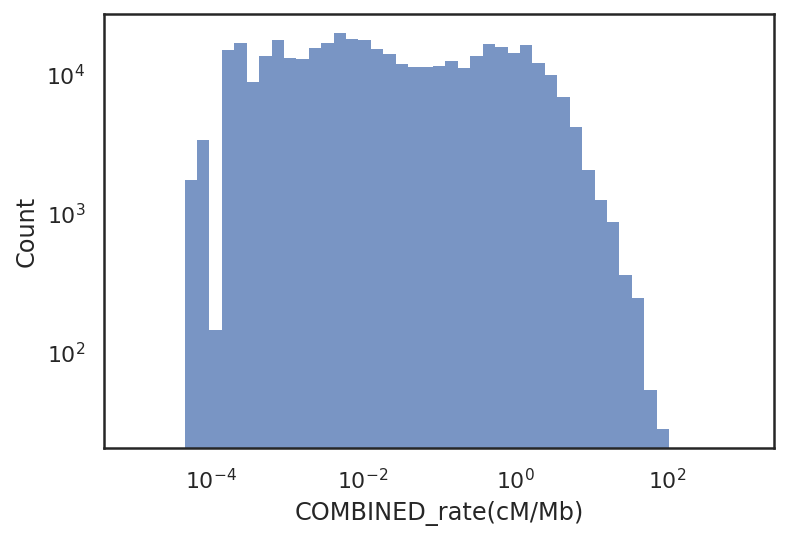

In [170]:
m = 2
g = sns.histplot(x=df_l[0]["COMBINED_rate(cM/Mb)"][m*100000:(m+1)*200000], bins=np.logspace(np.log10(0.00001),np.log10(1000), 50))
g.set(xscale="log", yscale="log")

In [105]:
df_l[1]

,position,COMBINED_rate(cM/Mb)
0,37,5.20775
1,57,5.20775
2,157,5.20775
3,170,5.21355
4,216,5.21355
...,...,...
2923207,143691509,NaN
2923208,143691526,NaN
2923209,143691548,NaN
2923210,143691549,NaN


In [14]:
callset.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, name='calldata', nodes=(Node(disabled=Tru…

In [58]:
ldhat_map["i_l"] = np.append(ldhat_map["POS"][1:], ldhat_map["POS"][-1:])-ldhat_map["POS"]

In [59]:
np.nansum(ldhat_map["i_l"]*ldhat_map["cM/Mb_temp"])/sum(ldhat_map["POS"][-1:])

0.706137020654888